## Nerve trace geometry -- project with Ryckie Wade

#### 1) Load all coordinates from all files.



In [1]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ALL_X_COORDS, ALL_Y_COORDS = [], []

for cadaver_id in range(1, 11):
    print(cadaver_id)
    input_path = "input_data/" + str(cadaver_id) + "/"

    x_file = input_path + "cadaver_x_" + str(cadaver_id) + ".csv"
    y_file = input_path + "cadaver_y_" + str(cadaver_id) + ".csv"

    files = [x_file, y_file]
    raw_coords = []

    for file in files:
        with open(file, newline='') as csvfile:
            r = csv.reader(csvfile, delimiter=' ', quotechar='|')
            for row in r: # There will only ever be one row expected
                # 10 nerve traces, each with clicks_per_trace clicks
                raw_coords.append(row)


    # Store in two formats for better computation
    x_coords, y_coords = [], []
    coords = []

    for x, y in zip(raw_coords[0][0].split(","), raw_coords[1][0].split(",")):
            coords.append([float(x), float(y)])
            x_coords.append(float(x))
            y_coords.append(float(y))

    clicks_per_trace = len(y_coords) / 10
    print("clicks_per_trace", clicks_per_trace)
    
    ALL_X_COORDS.append(x_coords)
    ALL_Y_COORDS.append(y_coords)

1
clicks_per_trace 21.0
2
clicks_per_trace 21.0
3
clicks_per_trace 21.0
4
clicks_per_trace 21.0
5
clicks_per_trace 21.0
6
clicks_per_trace 21.0
7
clicks_per_trace 21.0
8
clicks_per_trace 21.0
9
clicks_per_trace 21.0
10
clicks_per_trace 21.0


Compute averages.

In [16]:
mean_x = np.mean(ALL_X_COORDS, axis=0)
mean_y = np.mean(ALL_Y_COORDS, axis=0)

In [21]:
i = 1
print(i*clicks_per_trace)
print((i+1)*clicks_per_trace)

21.0
42.0


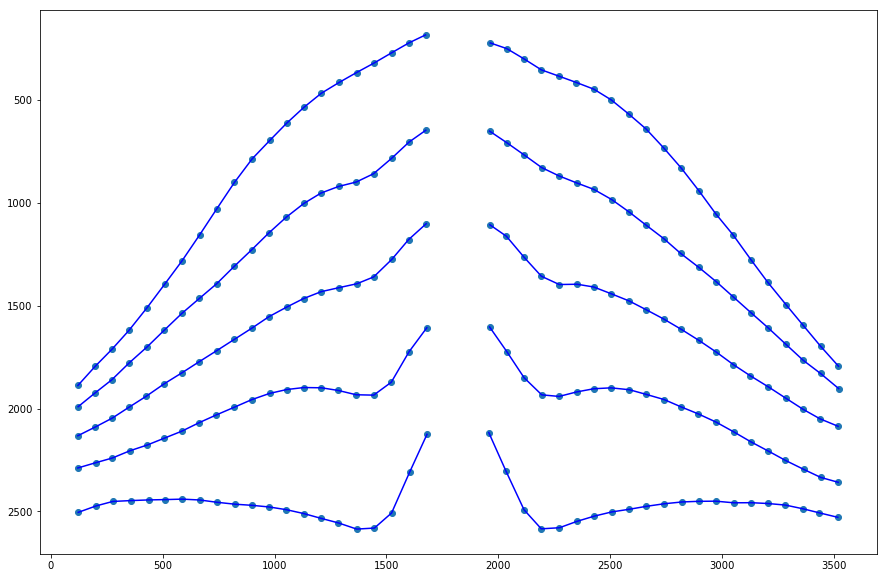

In [26]:
plt.figure(figsize=(15,10)) 
plt.scatter(mean_x, mean_y)
for i in range(10):
    start = int(i*clicks_per_trace)
    end = int((i+1)*clicks_per_trace)
    plt.plot(mean_x[start:end], mean_y[start:end], 'b')
    
plt.gca().invert_yaxis()
plt.show()

Plot with all traces.

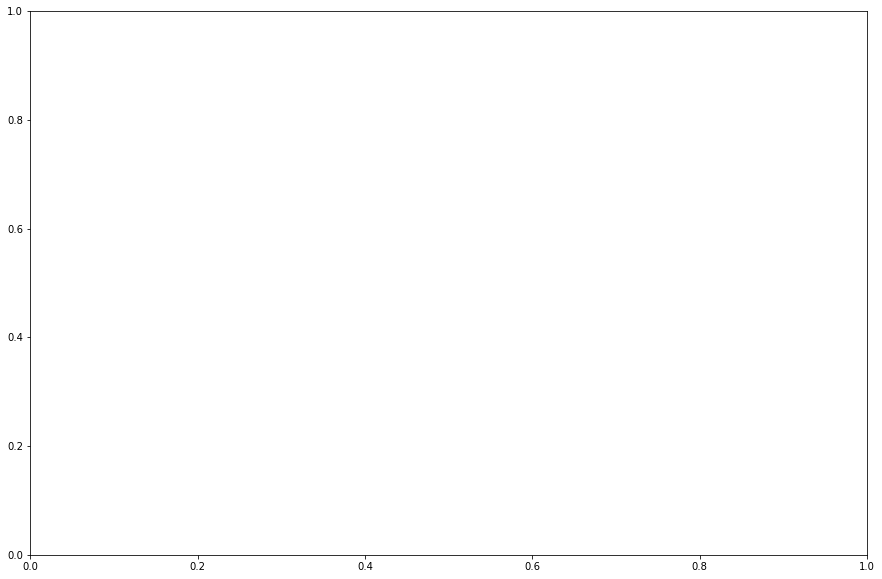

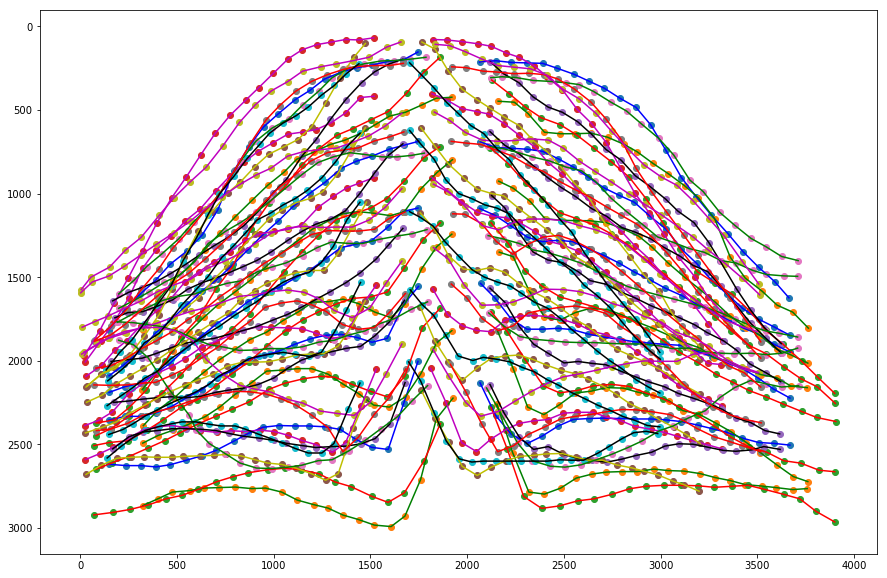

In [39]:
colours = ['b', 'g', 'r', 'm', 'k', 'y', 'g', 'r', 'm', 'k']
plt.figure(figsize=(15,10)) 
for i in range(10):
    plt.scatter(ALL_X_COORDS[i], ALL_Y_COORDS[i])
    for j in range(10):
        start = int(j*clicks_per_trace)
        end = int((j+1)*clicks_per_trace)
        plt.plot(ALL_X_COORDS[i][start:end], ALL_Y_COORDS[i][start:end], colours[i])

plt.gca().invert_yaxis()
plt.show()